# Pyxis Open Tech 2019 - Data Science en Pocos Minutos

## Objetivos

- Entender mediante un ejemplo cómo
   - Leer datos de un data set
   - Investigar principales problems
   - Transformaciones
- Mostrar un ejemplo de visualización de datos efectiva

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)

1. [Dependencias](#Dependencias)
1. [Funciones](#Funciones)
1. [Adquisición de Datos](#Adquisicion)
1. [Transformaciones](#Transformaciones)
1. [Visualización](#Visualizacion)
1. [Ejercicio (OPCIONAL)](#Ejercicio)
1. [Bibliografía](#Bibliografia)

<a id='Dependencias'></a>
## Dependencias
[Inicio ▲](#Indice)

**Instalación de dependencias**

In [1]:
install.packages("tm")  # for text mining
install.packages("SnowballC") # for text stemming
install.packages("wordcloud") # word-cloud generator 
install.packages("RColorBrewer") # color palettes

**Carga de dependencias**

In [2]:
library("downloader") 
library("dplyr")
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: NLP
Loading required package: RColorBrewer


<a id='Funciones'></a>
## Funciones
[Inicio ▲](#Indice)

In [3]:
dataFrameFromCSV <- function(filename, encoding="UTF-8") {
    delim = "," 
    dec = "."
    quote = "\""
    dataFrame <- read.csv(filename, header=TRUE, sep=delim, quote=quote, dec=dec,
                         encoding=encoding)
    
    return(dataFrame)
}

## Requerimientos

- Geolocalziar cada uno de los arboles
- Contar cantidad de arboles por geozonas para analizar
   - Que especie predomina en cada zona (por ejemplo barrio)
   - Comparar que barrios son más verdes, contemplando cantidad de arboles x m2 o x habitante
- Comparar cantidad de arboles x m2 o por habitatne contra otras ciudades de America Latina

<a id='Adquisicion'></a>
## Adquisición de Datos
[Inicio ▲](#Indice)

Para este ejemplo vamos a utilizar el dataset de censo de arbolado de la ciudad de Montevideo, con el cual ya hemos trabajado cuando estudiamos la etapa de Entendimiento de Datos y vimos como hacer un data profiling. En particular vamos a cargar solamente los datos de tres centros zonales.

Información del dataset disponible en: https://catalogodatos.gub.uy/dataset/censo-de-arbolado-2008

### Problemas
Algunos de los archivos csv del dataset completo, tienen pequeños problemas estructurales que deben solucionarse para realizar la carga completa de los datos.

**Problema con nombres de columnas**

Los siguientes documentos tenían diferentes nombres de columnas que el resto, por lo que primero debemos remplazar el cabezal o de lo contrario no podremos hacer el bind entre los datasets.

- archivo_comunal16.csv
- archivo_comunal1.csv

**Columna adicional**
    
A diferencia del resto del dataset, el documento archivo_comunal8.csv tiene una columna extra, lo cual impide el \"bind\" de los datos de este documento con los otros. Analizando el contenido del documento, puede notarse que la columna extra, es la última columna y está vacía. Por lo tanto, podemos interpretarlo como un descuido en el armado del dataset y suprimirla.

*Solución*:

Remmplazar con la expresión regular ```,,\\n``` por ```,\\n```.

'archivo_comunal8.csv':
Ultima columna no tiene nombre y todas las filas tiene doble , al final.
,,\n
,\n

Archivos con problemas 'archivo_comunal16.csv',

In [4]:
files <- c(
          'archivo_comunal1.csv', 
          'archivo_comunal2.csv', 
          'archivo_comunal3.csv', 
          'archivo_comunal4.csv',
          'archivo_comunal5.csv',
          'archivo_comunal6.csv',
          'archivo_comunal7.csv',
          'archivo_comunal8.csv',
          'archivo_comunal9.csv',
          'archivo_comunal10.csv',
          'archivo_comunal11.csv',
          'archivo_comunal12.csv',
          'archivo_comunal13.csv',
          'archivo_comunal14.csv',
          'archivo_comunal15.csv',
          'archivo_comunal16.csv',
          'archivo_comunal17.csv',
          'archivo_comunal18.csv'
)

dataFrame <- NULL
for (i in 1:length(files)) { 
    fileName <- files[i]
    part <- dataFrameFromCSV(fileName)
    dataFrame <- rbind(dataFrame, part)
}

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(226551L, 226552L, 226553L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(7641L, 7641L, 7641L, 7641L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(3348L, 3348L, 3348L, 3348L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(3840L, 3840L, 3840L, 3840L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(3426L, 3426L, 3440L, 3440L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(4L, 4L, 4L, 4L, 4L, 4L, 4L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(15L, 80L, 3L, 141L, 220L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(2L, 2L, 1L, 3L, 4L, 3L, 3L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*t

In [110]:
colnames(dataFrame)

[1] "Arbol"             "Cod_calle"         "Calle"            
 [4] "Cod_Entre"         "Entre"             "Cod_Y"            
 [7] "Y"                 "Numero"            "Ajuste"           
[10] "Acera"             "Alineacion"        "Ordinal"          
[13] "Ancho.Vereda"      "Distancia"         "CAP"              
[16] "Altura"            "Diametro.Copa"     "EV"               
[19] "Int.Aerea"         "Int.Sub"           "Genero"           
[22] "Especie"           "Nombre.científico"

In [5]:
# Recordemos cuantos datos estamos analizando
dim(dataFrame)

[1] 211512     23

In [4]:
head(dataFrame, 5)

Arbol,Cod_calle,Calle,Cod_Entre,Entre,Cod_Y,Y,Numero,Ajuste,Acera,⋯,Distancia,CAP,Altura,Diametro.Copa,EV,Int.Aerea,Int.Sub,Genero,Especie,Nombre.científico
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1833,7572,18 DE JULIO AVENIDA,4800,HERRERA Y OBES JULIO,6012,RIO NEGRO,,S/N,P,⋯,0,14,2,,2,N,N,28,1,Enterolobium contortisiliquum
1834,7572,18 DE JULIO AVENIDA,4800,HERRERA Y OBES JULIO,6012,RIO NEGRO,,S/N,P,⋯,0,14,2,,2,N,N,28,1,Enterolobium contortisiliquum
1835,7572,18 DE JULIO AVENIDA,4800,HERRERA Y OBES JULIO,6012,RIO NEGRO,,S/N,P,⋯,0,15,2,,2,N,N,28,1,Enterolobium contortisiliquum
4780,7572,18 DE JULIO AVENIDA,3492,PLAZA INDEPENDENCIA,354,ANDES,839,,I,⋯,5,250,7,3,2,N,N,63,2,Platanus occidentalis
4781,7572,18 DE JULIO AVENIDA,3492,PLAZA INDEPENDENCIA,354,ANDES,843,,I,⋯,5,200,4,2,2,N,N,63,2,Platanus occidentalis


In [113]:
str(dataFrame)

'data.frame':	211512 obs. of  23 variables:
 $ Arbol            : Factor w/ 182460 levels "1","100","1000",..: 792 793 794 4341 4342 4343 4344 4345 4346 4347 ...
 $ Cod_calle        : Factor w/ 2124 levels "","126","1482",..: 77 77 77 77 77 77 77 77 77 77 ...
 $ Calle            : Factor w/ 2724 levels "","18 DE JULIO AVENIDA",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Cod_Entre        : Factor w/ 2180 levels ""," Entre","0",..: 56 56 56 35 35 35 36 36 36 36 ...
 $ Entre            : Factor w/ 2788 levels "","18 DE JULIO AVENIDA",..: 38 38 38 67 67 67 5 5 5 5 ...
 $ Cod_Y            : Factor w/ 2219 levels ""," Y","0","1122",..: 70 70 70 38 38 38 43 43 43 43 ...
 $ Y                : Factor w/ 5581 levels "","18 DE JULIO AVENIDA",..: 75 75 75 9 9 9 23 23 23 23 ...
 $ Numero           : Factor w/ 7270 levels ""," Numero","0",..: 1 1 1 1050 1053 3 1063 1063 1087 1092 ...
 $ Ajuste           : Factor w/ 2276 levels "",".","0","1006",..: 186 186 186 1 1 184 1 1 1 1 ...
 $ Acera            : Factor w/ 

In [6]:
subset <- dataFrame %>% select("Genero", "Especie", "Nombre.científico")
head(subset)

Genero,Especie,Nombre.científico
<fct>,<fct>,<fct>
28,1,Enterolobium contortisiliquum
28,1,Enterolobium contortisiliquum
28,1,Enterolobium contortisiliquum
63,2,Platanus occidentalis
63,2,Platanus occidentalis
63,2,Platanus occidentalis


### Códigos de Especie

In [7]:
fileName <- "codigos-de-especie.csv"
codesDf <- dataFrameFromCSV(fileName)

In [8]:
head(codesDf)

Codigo.Género,Código.especie,Nombre.Científico,Nombre.común,porte
<int>,<int>,<fct>,<fct>,<fct>
111,1,Abelia grandiflora,Abelia,Ao
143,2,Abies nordmanniana,Abeto nordmaniana,Al
143,1,Abies pinsapo,Abeto pinsapo,Al
259,1,Abutilon molle,Farolito chino,Ao
10,6,Acacia baileyana,A. baileyana,Al
10,9,Acacia bonariensis,Uña de Gato,Ao


In [9]:
str(codesDf)

'data.frame':	540 obs. of  5 variables:
 $ Codigo.Género    : int  111 143 143 259 10 10 10 10 10 10 ...
 $ Código.especie   : int  1 2 1 1 6 9 1 2 8 3 ...
 $ Nombre.Científico: Factor w/ 540 levels "Abelia grandiflora",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Nombre.común     : Factor w/ 502 levels "A. baileyana",..: 9 10 11 252 1 487 237 13 249 20 ...
 $ porte            : Factor w/ 6 levels "Al","Ao","He",..: 2 1 1 2 1 2 1 1 1 1 ...


### Cruces de vias Montevideo

Los nombres de calles de Montevideo, presentes en el dataset de censo de arbolado, se encuentran codificados. En particular podemos encotnrar más información de estos códigos en el dataset [Cruces de Calles de Montevideo](https://catalogodatos.gub.uy/dataset/cruces-de-calles-montevideo). El mismo es un shapefile de ArcGIS, un sistema de información geográfica.

Para este análisis nos interesa conocer la posición GPS aproxiada de cada arbol (latitud, longitud). Para esto simpemente contamos con información de la calle en la cual ese encuentra el árbol y las calles de las esquinas.

Lo que vamos a hacer es cargar el shapefile del dataset y transformarlo a un CSV donde se tienen todos los cruces más la posición GPS de la intersección (latitud, longitud).

In [10]:
fileName <- 'v_sig_cruces_vias_montevideo.csv'
crucesViasMontevideo <- dataFrameFromCSV(fileName)

In [11]:
head(crucesViasMontevideo)

FID,COD_NOMBRE,COD_NOM_01,NOM_CALLE_,NOM_CAL_01,GID,COD_DEPTO,x,y
<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>
1,5934,5862,DR JOAQUIN REQUENA,AV GONZALO RAMIREZ,46346014,1,-56.16808,-34.91149
2,2076,5016,DIVINA COMEDIA,DR GABRIEL OTERO,46345012,1,-56.05812,-34.88995
3,5862,5934,AV GONZALO RAMIREZ,DR JOAQUIN REQUENA,46346015,1,-56.16808,-34.91144
4,2076,7224,DIVINA COMEDIA,AV PEDRO BLANES VIALE,46345013,1,-56.05812,-34.88995
5,2076,4356,DIVINA COMEDIA,RBLA REPUBLICA DE MEXICO,46345014,1,-56.05694,-34.89222
6,5862,6249,AV GONZALO RAMIREZ,DR JOAQUIN DE SALTERAIN,46346016,1,-56.16923,-34.91151


In [15]:
crucesViasMontevideo %>% select("COD_NOMBRE", "COD_NOM_01", "x", "y")
head(crucesViasMontevideos)

COD_NOMBRE,COD_NOM_01,x,y
<int>,<int>,<dbl>,<dbl>
5934,5862,-56.16808,-34.91149
2076,5016,-56.05812,-34.88995
5862,5934,-56.16808,-34.91144
2076,7224,-56.05812,-34.88995
2076,4356,-56.05694,-34.89222
5862,6249,-56.16923,-34.91151
2076,6210,-56.05812,-34.88995
6249,5862,-56.16923,-34.91151
5016,2076,-56.05812,-34.88995


ERROR: Error in head(crucesViasMontevideos): objeto 'crucesViasMontevideos' no encontrado


<a id='Transformaciones'></a>
## Transformaciones
[Inicio ▲](#Indice)

Vamos a estudiar cuales son las especies de árboles más comunes en la ciudad de Montevideo, para ello primero tenemos que aplicar algunas transformaciones a los datos.

Tengo que cambiar el tipo de las columnas Código.especie y Codigo.Género porque son integer, mientras que en el dataset de árboles las columnas de join son de tipo character.

In [18]:
# dat %>% mutate_each_(funs(factor), l1) %>% mutate_each_(funs(as.numeric), l2)
# dataset <- mutate_all(dataset, funs(as.numeric))
# codesDf <- codesDf %>% mutate_at(c("Código.especie", "Codigo.Género"), integer)

codesDf <- codesDf %>% mutate_at(c("Código.especie", "Codigo.Género"), as.character)

In [19]:
expandedDf <- left_join(dataFrame, codesDf, by = c("Genero"="Codigo.Género", "Especie"="Código.especie"))

Warning message:
“Column `Genero`/`Codigo.Género` joining factor and character vector, coercing into character vector”Warning message:
“Column `Especie`/`Código.especie` joining factor and character vector, coercing into character vector”

In [20]:
colnames(expandedDf)

[1] "Arbol"             "Cod_calle"         "Calle"            
 [4] "Cod_Entre"         "Entre"             "Cod_Y"            
 [7] "Y"                 "Numero"            "Ajuste"           
[10] "Acera"             "Alineacion"        "Ordinal"          
[13] "Ancho.Vereda"      "Distancia"         "CAP"              
[16] "Altura"            "Diametro.Copa"     "EV"               
[19] "Int.Aerea"         "Int.Sub"           "Genero"           
[22] "Especie"           "Nombre.científico" "Nombre.Científico"
[25] "Nombre.común"      "porte"

In [22]:
arbolesNombresDf <- expandedDf %>% select("Arbol", "Genero", "Especie", "Nombre.científico", "Nombre.común")
head(arbolesNombresDf)

Arbol,Genero,Especie,Nombre.científico,Nombre.común
<fct>,<chr>,<chr>,<fct>,<fct>
1833,28,1,Enterolobium contortisiliquum,"Timbò,oreja de negro"
1834,28,1,Enterolobium contortisiliquum,"Timbò,oreja de negro"
1835,28,1,Enterolobium contortisiliquum,"Timbò,oreja de negro"
4780,63,2,Platanus occidentalis,Plátano
4781,63,2,Platanus occidentalis,Plátano
4783,63,2,Platanus occidentalis,Plátano


In [23]:
# Cargo los datos como Corupus de la libreria tm
# corpus = Corpus(VectorSource(dataFrame$Nombre.científico)) 
corpus = Corpus(VectorSource(arbolesNombresDf$Nombre.común))

inspect(corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 211512

    [1] Timbò,oreja de negro  Timbò,oreja de negro  Timbò,oreja de negro 
    [4] Plátano               Plátano               Plátano              
    [7] Plátano               Plátano               Plátano              
   [10] Plátano               Plátano               Plátano              
   [13] Plátano               Plátano               Plátano              
   [16] Plátano               Plátano               Plátano              
   [19] Plátano               Plátano               Plátano              
   [22] Plátano               Plátano               Plátano              
   [25] Plátano               Plátano               Plátano              
   [28] Plátano               Plátano               Plátano              
   [31] Plátano               Plátano               Plátano              
   [34] Plátano               Plátano               Plátano              
   [37]

Remplazo caracteres especiales como /, @, | y espacios en blanco por el caracter "-" para eliminar variantes de una misma especie de árbol.

In [126]:
toScore <- content_transformer(function (x , pattern ) gsub(pattern, "-", x))
                               
corpus <- tm_map(corpus, toScore, "/")
corpus <- tm_map(corpus, toScore, "@")
corpus <- tm_map(corpus, toScore, "\\|")
corpus <- tm_map(corpus, toScore, " ")

Warning message in tm_map.SimpleCorpus(corpus, toScore, "/"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, toScore, "@"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, toScore, "\\|"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, toScore, " "):
“transformation drops documents”

Aplico algunas transformaciones básicas para uniformizar los valores de texto, eliminando errores de tipeo, stropwords del lenguaje que esconden variantes de una misma especie de árbol, simbolos de puntuación, etc.

In [127]:
# Convierto texto a minúscula (lowercase)
corpus <- tm_map(corpus, content_transformer(tolower))
# Elimino numeros 
corpus <- tm_map(corpus, removeNumbers)
# Elimino stopwords comunes en español
corpus <- tm_map(corpus, removeWords, stopwords("spanish"))
# Elimino punctuations
corpus <- tm_map(corpus, removePunctuation)
# Elimino extra white spaces
corpus <- tm_map(corpus, stripWhitespace)
# Text stemming
# corpus <- tm_map(corpus, stemDocument)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("spanish")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”

In [13]:
stopwords("spanish")

[1] "de"           "la"           "que"          "el"           "en"          
  [6] "y"            "a"            "los"          "del"          "se"          
 [11] "las"          "por"          "un"           "para"         "con"         
 [16] "no"           "una"          "su"           "al"           "lo"          
 [21] "como"         "más"          "pero"         "sus"          "le"          
 [26] "ya"           "o"            "este"         "sí"           "porque"      
 [31] "esta"         "entre"        "cuando"       "muy"          "sin"         
 [36] "sobre"        "también"      "me"           "hasta"        "hay"         
 [41] "donde"        "quien"        "desde"        "todo"         "nos"         
 [46] "durante"      "todos"        "uno"          "les"          "ni"          
 [51] "contra"       "otros"        "ese"          "eso"          "ante"        
 [56] "ellos"        "e"            "esto"         "mí"           "antes"       
 [61] "algunos"      "qué"          "unos"         "yo"           "otro"        
 [66] "otras"        "otra"         "él"           "tanto"        "esa"         
 [71] "estos"        "mucho"        "quienes"      "nada"         "muchos"      
 [76] "cual"         "poco"         "ella"         "estar"        "estas"       
 [81] "algunas"      "algo"         "nosotros"     "mi"           "mis"         
 [86] "tú"           "te"           "ti"           "tu"           "tus"         
 [91] "ellas"        "nosotras"     "vosotros"     "vosotras"     "os"          
 [96] "mío"          "mía"          "míos"         "mías"         "tuyo"        
[101] "tuya"         "tuyos"        "tuyas"        "suyo"         "suya"        
[106] "suyos"        "suyas"        "nuestro"      "nuestra"      "nuestros"    
[111] "nuestras"     "vuestro"      "vuestra"      "vuestros"     "vuestras"    
[116] "esos"         "esas"         "estoy"        "estás"        "está"        
[121] "estamos"      "estáis"       "están"        "esté"         "estés"       
[126] "estemos"      "estéis"       "estén"        "estaré"       "estarás"     
[131] "estará"       "estaremos"    "estaréis"     "estarán"      "estaría"     
[136] "estarías"     "estaríamos"   "estaríais"    "estarían"     "estaba"      
[141] "estabas"      "estábamos"    "estabais"     "estaban"      "estuve"      
[146] "estuviste"    "estuvo"       "estuvimos"    "estuvisteis"  "estuvieron"  
[151] "estuviera"    "estuvieras"   "estuviéramos" "estuvierais"  "estuvieran"  
[156] "estuviese"    "estuvieses"   "estuviésemos" "estuvieseis"  "estuviesen"  
[161] "estando"      "estado"       "estada"       "estados"      "estadas"     
[166] "estad"        "he"           "has"          "ha"           "hemos"       
[171] "habéis"       "han"          "haya"         "hayas"        "hayamos"     
[176] "hayáis"       "hayan"        "habré"        "habrás"       "habrá"       
[181] "habremos"     "habréis"      "habrán"       "habría"       "habrías"     
[186] "habríamos"    "habríais"     "habrían"      "había"        "habías"      
[191] "habíamos"     "habíais"      "habían"       "hube"         "hubiste"     
[196] "hubo"         "hubimos"      "hubisteis"    "hubieron"     "hubiera"     
[201] "hubieras"     "hubiéramos"   "hubierais"    "hubieran"     "hubiese"     
[206] "hubieses"     "hubiésemos"   "hubieseis"    "hubiesen"     "habiendo"    
[211] "habido"       "habida"       "habidos"      "habidas"      "soy"         
[216] "eres"         "es"           "somos"        "sois"         "son"         
[221] "sea"          "seas"         "seamos"       "seáis"        "sean"        
[226] "seré"         "serás"        "será"         "seremos"      "seréis"      
[231] "serán"        "sería"        "serías"       "seríamos"     "seríais"     
[236] "serían"       "era"          "eras"         "éramos"       "erais"       
[241] "eran"         "fui"          "fuiste"       "fue"          "fuimos"      
[246] "fuisteis"     "fueron"    

**Term-Document matrix**

Una matriz término-documento es una tabla que contiene la frequencia de cada palabra en un conjunto de documentos. Mientras que en las columnas se colocan todas las palabras, en las filas se colocan todos los documentos analizados. De esta forma se tiene la cantidad de ocurrencias de cada palabra en cada documento.

Ver https://en.wikipedia.org/wiki/Document-term_matrix.

In [128]:
dtm <- TermDocumentMatrix(corpus)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

head(d, 25)

,word,freq
paraíso,paraíso,44317
fresnoamericano,fresnoamericano,42382
plátano,plátano,22165
tipa,tipa,10990
fresnoeuropeo,fresnoeuropeo,6293
arcenegundo,arcenegundo,5742
anacahuita,anacahuita,4744
laurelrosa,laurelrosa,4652
jacaranda,jacaranda,3863
olmoprocera,olmoprocera,3234


<a id='Visualizacion'></a>
## Visualización
[Inicio ▲](#Indice)

Vamos a ilustrar la importancia de cada especie de árbol a través de una visualizción de tipo *Wordcloud*.

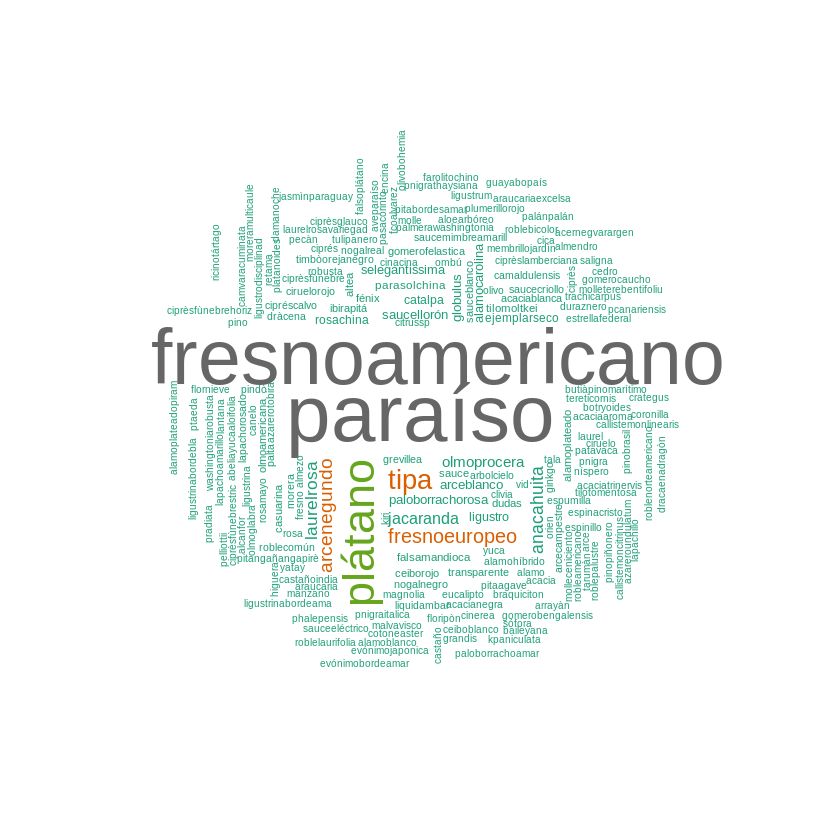

In [129]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

In [25]:
crucesViasMontevideo <- crucesViasMontevideo %>% mutate_at(c("COD_NOMBRE", "COD_NOM_01"), as.character)

In [26]:
latLongDf <- left_join(expandedDf, crucesViasMontevideo, by = c("Cod_calle"="COD_NOMBRE", "Cod_Entre"="COD_NOM_01"))

Warning message:
“Column `Cod_calle`/`COD_NOMBRE` joining factor and character vector, coercing into character vector”Warning message:
“Column `Cod_Entre`/`COD_NOM_01` joining factor and character vector, coercing into character vector”

In [28]:
colnames(latLongDf)

[1] "Arbol"             "Cod_calle"         "Calle"            
 [4] "Cod_Entre"         "Entre"             "Cod_Y"            
 [7] "Y"                 "Numero"            "Ajuste"           
[10] "Acera"             "Alineacion"        "Ordinal"          
[13] "Ancho.Vereda"      "Distancia"         "CAP"              
[16] "Altura"            "Diametro.Copa"     "EV"               
[19] "Int.Aerea"         "Int.Sub"           "Genero"           
[22] "Especie"           "Nombre.científico" "Nombre.Científico"
[25] "Nombre.común"      "porte"             "FID"              
[28] "NOM_CALLE_"        "NOM_CAL_01"        "GID"              
[31] "COD_DEPTO"         "x"                 "y"

In [29]:
latLongDf <- latLongDf %>% select("Arbol", "Calle", "Entre", "Nombre.científico", "Nombre.común", "x", "y")
head(latLongDf)

Arbol,Calle,Entre,Nombre.científico,Nombre.común,x,y
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1833,18 DE JULIO AVENIDA,HERRERA Y OBES JULIO,Enterolobium contortisiliquum,"Timbò,oreja de negro",-56.19476,-34.90613
1833,18 DE JULIO AVENIDA,HERRERA Y OBES JULIO,Enterolobium contortisiliquum,"Timbò,oreja de negro",-56.19475,-34.90618
1834,18 DE JULIO AVENIDA,HERRERA Y OBES JULIO,Enterolobium contortisiliquum,"Timbò,oreja de negro",-56.19476,-34.90613
1834,18 DE JULIO AVENIDA,HERRERA Y OBES JULIO,Enterolobium contortisiliquum,"Timbò,oreja de negro",-56.19475,-34.90618
1835,18 DE JULIO AVENIDA,HERRERA Y OBES JULIO,Enterolobium contortisiliquum,"Timbò,oreja de negro",-56.19476,-34.90613
1835,18 DE JULIO AVENIDA,HERRERA Y OBES JULIO,Enterolobium contortisiliquum,"Timbò,oreja de negro",-56.19475,-34.90618


In [30]:
dim(latLongDf)

[1] 251273      7

In [46]:
library(ggmap)
map <- get_map(location = 'Europe', zoom = 4)

ERROR: Error: Google now requires an API key.
       See ?register_google for details.


In [ ]:
mapPoints <- ggmap(map) +
+   geom_point(aes(x = x, y = y, size = 1, data = latLongDf, alpha = .5)